In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/kaggle"

In [ ]:

%cd /content/gdrive/My Drive/kaggle

/content/gdrive/My Drive/kaggle


In [ ]:
!kaggle datasets download -d zeshanali/googleplaystore

  0% 0.00/304k [00:00<?, ?B/s]
100% 304k/304k [00:00<00:00, 29.4MB/s]


In [ ]:
!unzip \*.zip  && rm *.zip

Archive:  googleplaystore.zip
replace googleplaystore.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
df=pd.read_csv('googleplaystore.csv')

In [ ]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,7-Jan-18,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,15-Jan-18,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,1-Aug-18,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,8-Jun-18,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,20-Jun-18,1.1,4.4 and up


## so lets see top 10 apps by downloads, size, reviews first. And then lets go on exploring as we go

In [ ]:
type(df.columns)

pandas.core.indexes.base.Index

In [ ]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [ ]:
df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [ ]:
df.shape

(10841, 13)

##looking for null values


In [ ]:
df.isna().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

#filling null values with the most repeated valye from that column

In [ ]:
df['Rating'].fillna(df['Rating'].value_counts().index[0], inplace=True)


In [ ]:
df['Type'].fillna(df['Type'].value_counts().index[0], inplace=True)
df['Content Rating'].fillna(df['Content Rating'].value_counts().index[0], inplace=True)
df['Current Ver'].fillna(df['Current Ver'].value_counts().index[0], inplace=True)
df['Android Ver'].fillna(df['Android Ver'].value_counts().index[0], inplace=True)


## converting installs, size, reviews into numeric value


In [ ]:
for i in range(0,len(df)-1):
  df['Size'][i]=df['Size'][i].rstrip(df['Size'][i][-1])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
df.rename(columns={'Size': 'Size in MB'},inplace=True)

In [ ]:
for i in range(0,len(df)-1):
  df['Installs'][i]=df['Installs'][i].rstrip(df['Installs'][i][-1])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
df

,App,Category,Rating,Reviews,Size in MB,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19,"10,000",Free,0,Everyone,Art & Design,7-Jan-18,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14,"500,000",Free,0,Everyone,Art & Design;Pretend Play,15-Jan-18,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,"5,000,000",Free,0,Everyone,Art & Design,1-Aug-18,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25,"50,000,000",Free,0,Teen,Art & Design,8-Jun-18,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,"100,000",Free,0,Everyone,Art & Design;Creativity,20-Jun-18,1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53,"5,000",Free,0,Everyone,Education,25-Jul-17,1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6,100,Free,0,Everyone,Education,6-Jul-18,1,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,4.4,3,9.5,"1,000",Free,0,Everyone,Medical,20-Jan-17,1,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with devic,"1,000",Free,0,Mature 17+,Books & Reference,19-Jan-15,Varies with device,Varies with device


In [ ]:
df.tail()

,App,Category,Rating,Reviews,Size in MB,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53,"5,000",Free,0,Everyone,Education,25-Jul-17,1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6,100,Free,0,Everyone,Education,6-Jul-18,1,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,4.4,3,9.5,"1,000",Free,0,Everyone,Medical,20-Jan-17,1,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with devic,"1,000",Free,0,Mature 17+,Books & Reference,19-Jan-15,Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,25-Jul-18,Varies with device,Varies with device


In [ ]:
len(df)

10841

In [ ]:
  df['Installs'][10840]=df['Installs'][10840].rstrip(df['Installs'][10840][-1])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df.tail()

,App,Category,Rating,Reviews,Size in MB,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53,"5,000",Free,0,Everyone,Education,25-Jul-17,1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6,100,Free,0,Everyone,Education,6-Jul-18,1,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,4.4,3,9.5,"1,000",Free,0,Everyone,Medical,20-Jan-17,1,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with devic,"1,000",Free,0,Mature 17+,Books & Reference,19-Jan-15,Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000",Free,0,Everyone,Lifestyle,25-Jul-18,Varies with device,Varies with device


In [ ]:
  df['Size in MB'][10840]=df['Size in MB'][10840].rstrip(df['Size in MB'][10840][-1])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df.tail()

,App,Category,Rating,Reviews,Size in MB,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53,"5,000",Free,0,Everyone,Education,25-Jul-17,1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6,100,Free,0,Everyone,Education,6-Jul-18,1,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,4.4,3,9.5,"1,000",Free,0,Everyone,Medical,20-Jan-17,1,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with devic,"1,000",Free,0,Mature 17+,Books & Reference,19-Jan-15,Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19,"10,000,000",Free,0,Everyone,Lifestyle,25-Jul-18,Varies with device,Varies with device


In [ ]:
df['Reviews'] = pd.to_numeric(df['Reviews'],errors='coerce')


In [ ]:
df['Size in MB'] = pd.to_numeric(df['Size in MB'],errors='coerce')


In [ ]:
df.head()

,App,Category,Rating,Reviews,Size in MB,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19.0,"10,000",Free,0,Everyone,Art & Design,7-Jan-18,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14.0,"500,000",Free,0,Everyone,Art & Design;Pretend Play,15-Jan-18,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8.7,"5,000,000",Free,0,Everyone,Art & Design,1-Aug-18,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25.0,"50,000,000",Free,0,Teen,Art & Design,8-Jun-18,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2.8,"100,000",Free,0,Everyone,Art & Design;Creativity,20-Jun-18,1.1,4.4 and up


In [ ]:
df.dtypes


App                object
Category           object
Rating            float64
Reviews           float64
Size in MB        float64
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [ ]:
#cleaning is done!

In [ ]:
df['Category'].value_counts()[:10]
#top 10 apps by category

FAMILY             1972
GAME               1144
TOOLS               843
MEDICAL             463
BUSINESS            460
PRODUCTIVITY        424
PERSONALIZATION     392
COMMUNICATION       387
SPORTS              384
LIFESTYLE           382
Name: Category, dtype: int64

### top 10 apps by ratings, sorting them in order of ratings

In [ ]:
df.nlargest(10, 'Rating').sort_values(by='Reviews',ascending=False) 

,App,Category,Rating,Reviews,Size in MB,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1030,Prosperity,EVENTS,5.0,16.0,2.3,100,Free,0,Everyone,Events,9-Jul-18,1.14,2.0 and up
329,Hojiboy Tojiboyev Life Hacks,COMICS,5.0,15.0,37.0,"1,000",Free,0,Everyone,Comics,26-Jun-18,2,4.0.3 and up
636,Girls Live Talk - Free Text and Video Chat,DATING,5.0,6.0,5.0,100,Free,0,Mature 17+,Dating,1-Aug-18,8.2,4.0.3 and up
612,American Girls Mobile Numbers,DATING,5.0,5.0,4.4,"1,000",Free,0,Mature 17+,Dating,17-Jul-18,3,4.0.3 and up
633,Spine- The dating app,DATING,5.0,5.0,9.3,500,Free,0,Teen,Dating,14-Jul-18,4,4.0.3 and up
640,Online Girls Chat Group,DATING,5.0,5.0,5.0,100,Free,0,Mature 17+,Dating,2-Aug-18,8.2,4.0.3 and up
1028,SUMMER SONIC app,EVENTS,5.0,4.0,61.0,500,Free,0,Everyone,Events,24-Jul-18,1,4.4 and up
654,Speeding Joyride & Car Meet App,DATING,5.0,3.0,25.0,100,Free,0,Mature 17+,Dating,20-Jul-18,1.2.9,4.1 and up
615,Awake Dating,DATING,5.0,2.0,70.0,100,Free,0,Mature 17+,Dating,24-Jul-18,2.2.9,4.4 and up
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,NaN,NaN,Fr,0,Everyone,Everyone,11-Feb-18,1.0.19,4.0 and up,4.1 and up


### top 10 apps by reviews

In [ ]:
df.nlargest(10, 'Reviews')

,App,Category,Rating,Reviews,Size in MB,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2544,Facebook,SOCIAL,4.1,78158306.0,NaN,"1,000,000,000",Free,0,Teen,Social,3-Aug-18,Varies with device,Varies with device
3943,Facebook,SOCIAL,4.1,78128208.0,NaN,"1,000,000,000",Free,0,Teen,Social,3-Aug-18,Varies with device,Varies with device
336,WhatsApp Messenger,COMMUNICATION,4.4,69119316.0,NaN,"1,000,000,000",Free,0,Everyone,Communication,3-Aug-18,Varies with device,Varies with device
381,WhatsApp Messenger,COMMUNICATION,4.4,69119316.0,NaN,"1,000,000,000",Free,0,Everyone,Communication,3-Aug-18,Varies with device,Varies with device
3904,WhatsApp Messenger,COMMUNICATION,4.4,69109672.0,NaN,"1,000,000,000",Free,0,Everyone,Communication,3-Aug-18,Varies with device,Varies with device
2604,Instagram,SOCIAL,4.5,66577446.0,NaN,"1,000,000,000",Free,0,Teen,Social,31-Jul-18,Varies with device,Varies with device
2545,Instagram,SOCIAL,4.5,66577313.0,NaN,"1,000,000,000",Free,0,Teen,Social,31-Jul-18,Varies with device,Varies with device
2611,Instagram,SOCIAL,4.5,66577313.0,NaN,"1,000,000,000",Free,0,Teen,Social,31-Jul-18,Varies with device,Varies with device
3909,Instagram,SOCIAL,4.5,66509917.0,NaN,"1,000,000,000",Free,0,Teen,Social,31-Jul-18,Varies with device,Varies with device
382,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56646578.0,NaN,"1,000,000,000",Free,0,Everyone,Communication,1-Aug-18,Varies with device,Varies with device


### seeing the content_rating


In [ ]:
df['Content Rating'].value_counts()

Everyone           8715
Teen               1208
Mature 17+          499
Everyone 10+        414
Adults only 18+       3
Unrated               2
Name: Content Rating, dtype: int64

In [ ]:
print(df['Size in MB'].max())
print(df['Size in MB'].min())
print(df['Size in MB'].mean())

1020.0
1.0
37.035440131219154


grouping by category, creating anothet df for it 

In [ ]:
df_category=df.groupby(['Category']).mean()


In [ ]:
df_category.head(5)

,Rating,Reviews,Size in MB
Category,,,
1.9,19.000000,NaN,NaN
ART_AND_DESIGN,4.360000,26376.000000,12.370968
AUTO_AND_VEHICLES,4.220000,13690.188235,34.502667
BEAUTY,4.303774,7476.226415,13.795745
BOOKS_AND_REFERENCE,4.358442,95060.904762,40.349746


In [ ]:
 df_category.drop('1.9',inplace=True)


In [ ]:
df_category.head()

,Rating,Reviews,Size in MB
Category,,,
ART_AND_DESIGN,4.360000,26376.000000,12.370968
AUTO_AND_VEHICLES,4.220000,13690.188235,34.502667
BEAUTY,4.303774,7476.226415,13.795745
BOOKS_AND_REFERENCE,4.358442,95060.904762,40.349746
BUSINESS,4.216522,30335.982609,26.622500


In [ ]:
df_category.columns

Index(['Rating', 'Reviews', 'Size in MB'], dtype='object')

In [ ]:
df_category.head()

,Rating,Reviews,Size in MB
Category,,,
ART_AND_DESIGN,4.360000,26376.000000,12.370968
AUTO_AND_VEHICLES,4.220000,13690.188235,34.502667
BEAUTY,4.303774,7476.226415,13.795745
BOOKS_AND_REFERENCE,4.358442,95060.904762,40.349746
BUSINESS,4.216522,30335.982609,26.622500


In [ ]:
df_category

,Rating,Reviews,Size in MB
Category,,,
ART_AND_DESIGN,4.360000,2.637600e+04,12.370968
AUTO_AND_VEHICLES,4.220000,1.369019e+04,34.502667
BEAUTY,4.303774,7.476226e+03,13.795745
BOOKS_AND_REFERENCE,4.358442,9.506090e+04,40.349746
BUSINESS,4.216522,3.033598e+04,26.622500
COMICS,4.163333,5.638793e+04,34.111765
COMMUNICATION,4.195349,2.107138e+06,55.786792
DATING,4.042308,3.115931e+04,16.710377
EDUCATION,4.389103,2.538191e+05,30.528829


In [ ]:
df_category.reset_index(inplace=True)

In [ ]:
df_category.head()

,Category,Rating,Reviews,Size in MB
0,ART_AND_DESIGN,4.360000,26376.000000,12.370968
1,AUTO_AND_VEHICLES,4.220000,13690.188235,34.502667
2,BEAUTY,4.303774,7476.226415,13.795745
3,BOOKS_AND_REFERENCE,4.358442,95060.904762,40.349746
4,BUSINESS,4.216522,30335.982609,26.622500


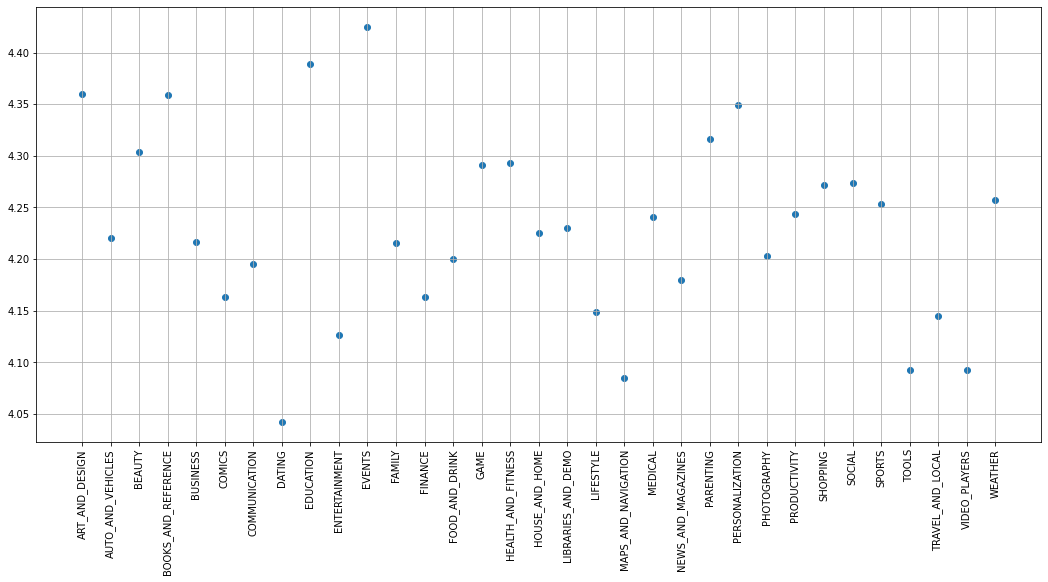

In [ ]:
plt.figure(figsize=(18,8))
plt.scatter(x=df_category['Category'],y=df_category['Rating'])
plt.xticks(rotation=90)
plt.grid()

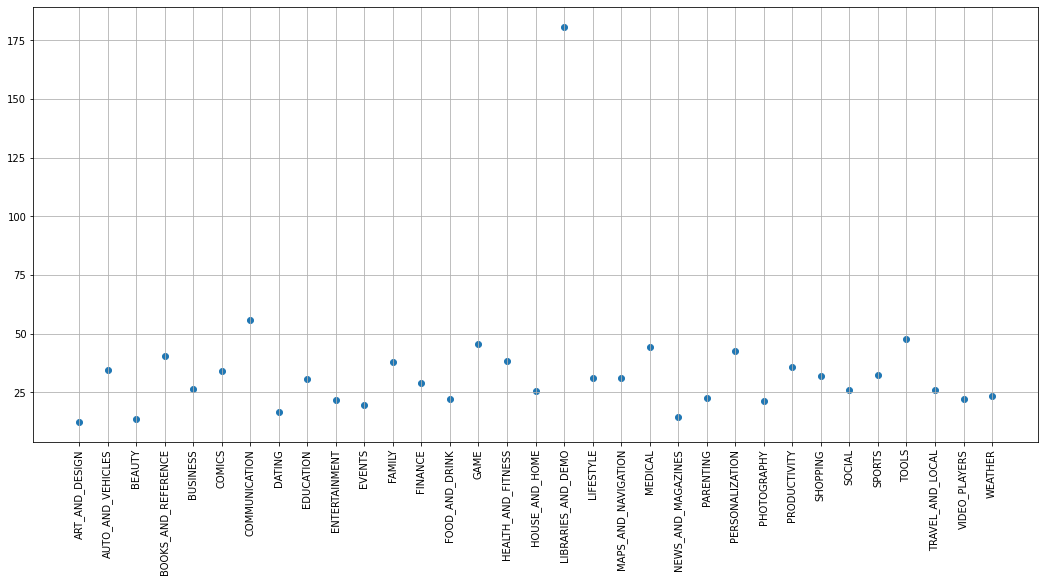

In [ ]:
plt.figure(figsize=(18,8))
plt.scatter(x=df_category['Category'],y=df_category['Size in MB'])
plt.xticks(rotation=90)
plt.grid()

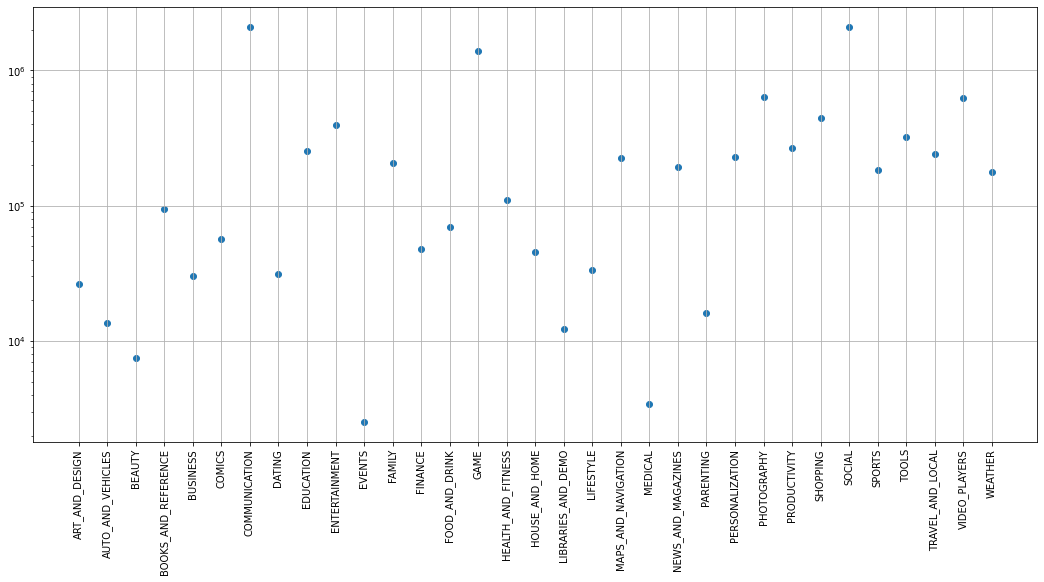

In [ ]:
plt.figure(figsize=(18,8))
plt.scatter(x=df_category['Category'],y=df_category['Reviews'])
plt.yscale('log')
plt.xticks(rotation=90)
plt.grid()

Text(0, 0.5, 'log')

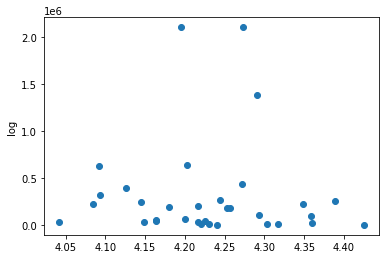

In [ ]:
plt.scatter(df_category['Rating'],df_category['Reviews'],marker='o')
plt.ylabel('log')